In [19]:
import pandas as pd
import numpy as np
import talib as ta
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import datetime as dt

In [20]:
start = dt.datetime(2022, 1, 1)
end = dt.datetime(2022, 7, 1)

df = data.DataReader('DEXJPUS', 'fred', start, end)

In [21]:
df.head(20)

,DEXJPUS
DATE,
2022-01-03,115.27
2022-01-04,116.12
2022-01-05,115.91
2022-01-06,115.78
2022-01-07,115.61
2022-01-10,115.14
2022-01-11,115.38
2022-01-12,114.74
2022-01-13,114.06


In [22]:
df = df.rename(columns={'DEXJPUS' : 'Close'})

In [23]:
# NaNがあるとグラフ表示が上手くできないので削除
df = df.dropna()

In [24]:
df.head(20)

,Close
DATE,
2022-01-03,115.27
2022-01-04,116.12
2022-01-05,115.91
2022-01-06,115.78
2022-01-07,115.61
2022-01-10,115.14
2022-01-11,115.38
2022-01-12,114.74
2022-01-13,114.06


In [25]:
date = df.index # X軸に日付を指定
close = df['Close'] # Y軸に株価を指定

span01 = 5
span02 = 25
span03 = 50

df['SMA01'] = close.rolling(window=span01).mean()
df['SMA02'] = close.rolling(window=span02).mean()
df['SMA03'] = close.rolling(window=span03).mean()
df['macd'], df['macdsignal'], df['macdhist'] = ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
df['RSI'] = ta.RSI(close, timeperiod=span02)
df['upper'], df['middle'], df['lower'] = ta.BBANDS(close, timeperiod=span02, nbdevup=2,nbdevdn=2, matype=0)

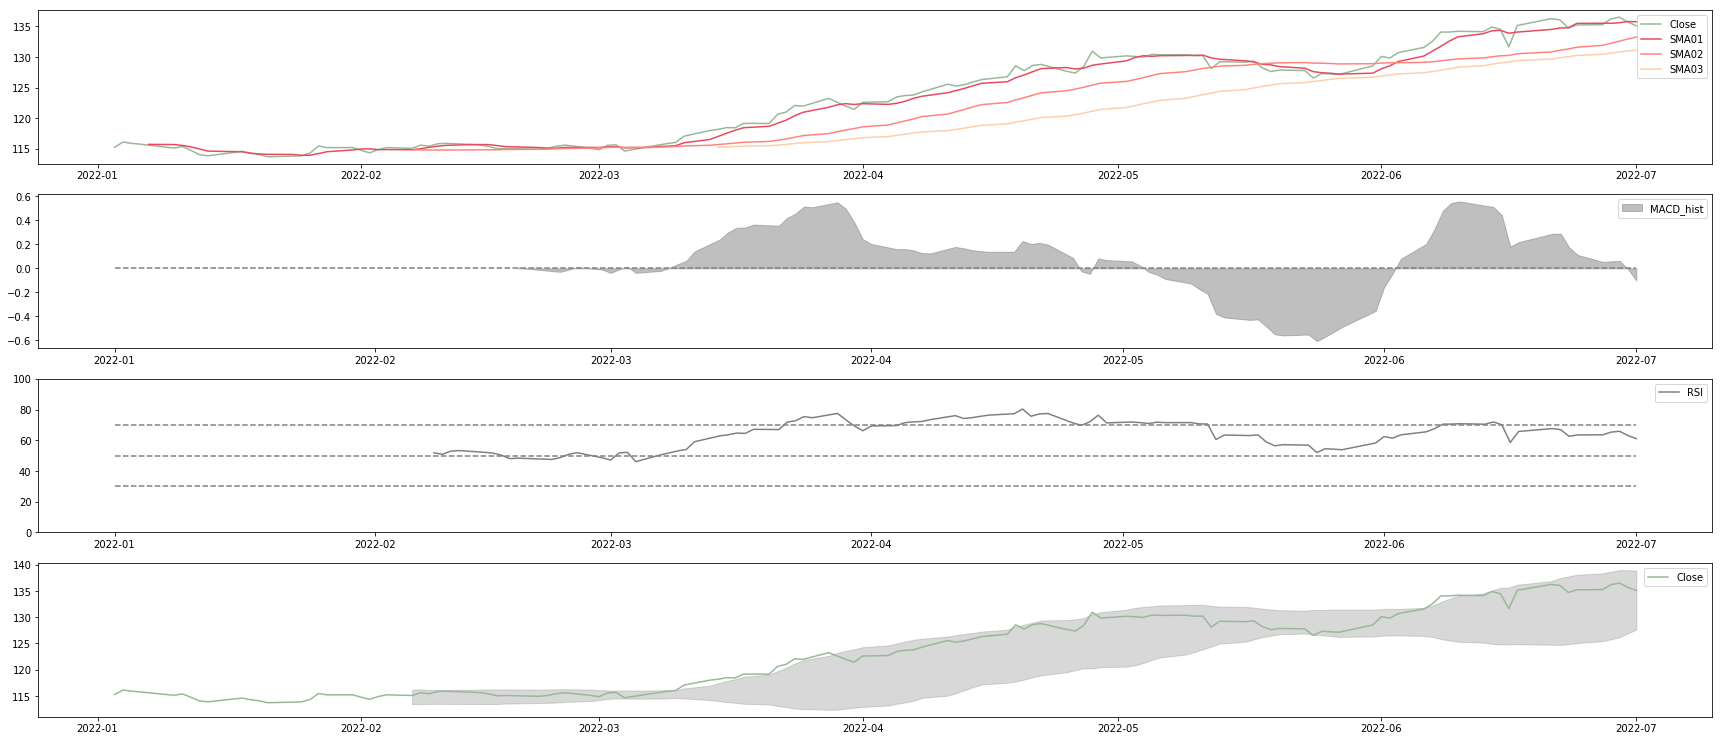

In [26]:
plt.figure(figsize=(30, 13)) # グラフのサイズを指定

# 移動平均
plt.subplot(4, 1, 1)  # 2行1列のグラフの1番目のグラフを表示
plt.plot(date, close, label='Close', color='#99b898')  # X軸に日付、Y軸に株価、Closeを表示
plt.plot(date, df['SMA01'], label='SMA01', color='#e84a5f')  # X軸に日付、Y軸に移動平均線、SMA01を表示
plt.plot(date, df['SMA02'], label='SMA02', color='#ff847c')  # X軸に日付、Y軸に移動平均線、SMA02を表示
plt.plot(date, df['SMA03'], label='SMA03', color='#feceab')  # X軸に日付、Y軸に移動平均線、SMA03を表示
plt.legend()

# MACD
plt.subplot(4, 1, 2) 
plt.fill_between(date, df['macdhist'], color='grey', alpha=0.5, label='MACD_hist')
plt.hlines(0, start, end, 'gray', linestyles='dashed')
plt.legend()

# RSI
plt.subplot(4, 1, 3) 
plt.plot(date, df['RSI'], label='RSI', color='gray')
plt.ylim(0, 100)
plt.hlines([30,50,70], start, end, 'grey', linestyles='dashed')
plt.legend()

# ボリンジャーバンド
plt.subplot(4, 1, 4) 
plt.plot(date, close, label='Close', color='#99b898') # close_dataを使用してグラフを描画
plt.fill_between(date, df['upper'], df['lower'], color='gray', alpha=0.3)
plt.legend()